# Projeto 2 - Ciência dos Dados

## Teste e predição de qualidade de vinhos brancos

## Integrantes:

Alberto Carrera

Arthur da Fonseca

Gabriel Barbosa

Rodrigo Gomes

In [1]:
%matplotlib inline
import pandas as pd
import os

# Para ter melhor print
from IPython.display import display

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())


Esperamos trabalhar no diretório
C:\Users\rocam\OneDrive\Documentos\Insper\2 semestre\CDados\Projeto-2-CDADOS


### Aqui estamos convertendo o csv em dataframe. Utilizamos o separador de casas decimais para que as virgulas fossem transformadas em ponto, para que assim o python conseguisse ler os resultados de forma adequada.

In [14]:
dados1 = pd.read_csv('winequality-white.csv', sep=';')
dados1 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


### O código realizado na célula debaixo demonstra que nenhum dos valores no Dataset eram nulos, concluindo nossa limpeza do Dataset, já que assim podemos analisar ele sem problemas

In [4]:
dados1.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

### A partir do value counts, podemos concluir que o nosso Dataset pode ser analisado através da forma de classificador, pois os vinhos estão classificados em apenas 7 categorias, sendo elas de 3 a 9. Portanto, utilizar o metodo de classificador seria mais ideal, para que o resultado do nosso modelo de calculo de probabilidade se encaixe dentro dessas 7 categorias.

In [5]:
dados1.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

### Para fazer uma analise dos dados do nosso Dataset, fizemos uma tabela de graficos de correlação entre todos os elementos da tabela, em que é possível ver que poucos dados possuem correlações fortes, já que a maioria deles estao bem distribuidos perante o gráfico.

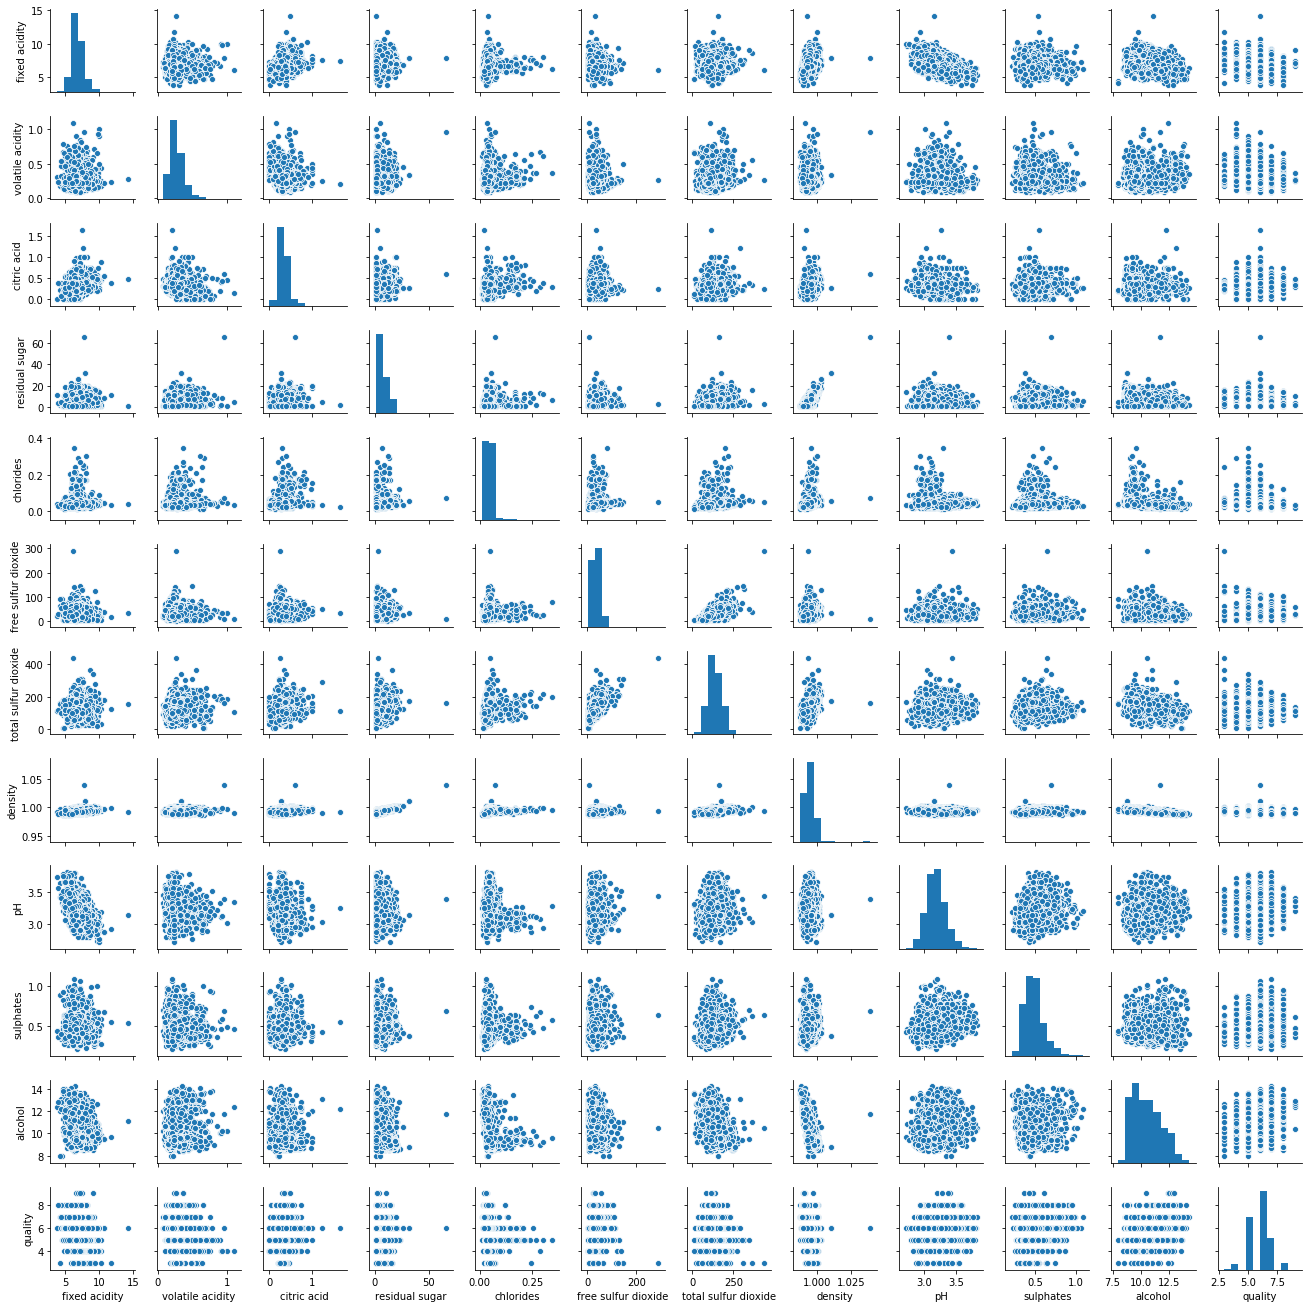

In [15]:
import seaborn as sns
sns.pairplot(dados1, height=1.5);

### Na célula abaixo fizemos a mesma coisa que a de cima, porém na forma numérica. Isso permite analisarmos mais a correlação entre os dados do Dataset e concluir que muitas delas são correlações negativas, e que a grande maioria não é nem moderada, já que poucas correlações resultaram em numeros acima de 0.4

In [7]:
dados1.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


### Para fazer a simulação dos nossos dados, utilizamos o modelo Decision Tree. Optamos por dividir nosso Dataset em 5 datasets, para fazer treinamento em 4 deles e realizar o teste da probabilidade em apenas 1, sendo esse processo repetido 5 vezes. O resultado da célula abaixo são as porcentagens de acerto de cada uma dessas tentativas de dividir o Dataset em 5. 


In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
cross_val_score(clf, dados1.iloc[:,:-1], dados1.quality, cv=5)

array([0.36938776, 0.37959184, 0.41326531, 0.4453524 , 0.42288049])

### Para testar se o nosso modelo é ideal para prever a qualidade dos vinhos, foi utilizado o codigo abaixo, em que ao realizar o teste 

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dados1.iloc[:,:-1], dados1['quality'], test_size=0.4, random_state=0)
clf1 = DecisionTreeClassifier(random_state=0)
clf1.fit(X_train, y_train)
clf1.score(X_test, y_test)

0.5637755102040817

In [13]:
pd.crosstab(y_test, clf1.predict(X_test))

col_0,3,4,5,6,7,8,9
quality,,,,,,,
3,0,0,4,6,0,0,0
4,4,11,31,29,3,0,0
5,0,19,355,197,23,3,1
6,2,11,165,543,108,15,0
7,0,4,32,123,174,24,2
8,0,0,5,19,25,22,0
